<a href="https://colab.research.google.com/github/MonitSharma/Learn-Quantum-Computing-with-Qiskit/blob/main/The_Case_for_Quantum_Computers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Case for Quantum Computers!

The rationale behind the utilization of quantum computers lies in their ability to tackle specific problems that are beyond the capabilities of classical computers. In order to comprehend this distinction, it is crucial to examine the computational complexity associated with solving particular problem sets.

Let's consider a simple problem of adding two numbers:

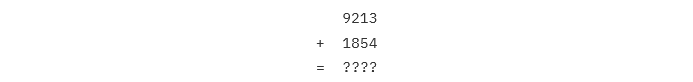

The process of adding two n-digit numbers can be accomplished through a series of elementary operations, wherein each operation involves adding two single-digit numbers. By evaluating the complexity of this procedure, we can determine the number of basic additions required and how this quantity relates to the value of n. This number can be denoted as O(n), representing the computational scaling of the addition operation.

For the easiest case, when there is no need to carry 1, only $n$ basic operations are required. In the worst case we need to perform $n$ carry operations, each will require an extra addition, so we conclude

$$ n \le O(n) \le 2n $$

## The Big O Notation

We can infer from the above that $\mathcal{O}(n)$ grows linearly with $n$. More generally, we can say that a linear function of $n$ can be found which acts as an upper bound for $\mathcal{O}(n)$ when $n$ is large. Since this is a long and wordy sentence, we won't actually want to say this very often. Instead, we can express it more compactly using 'big O notation'.



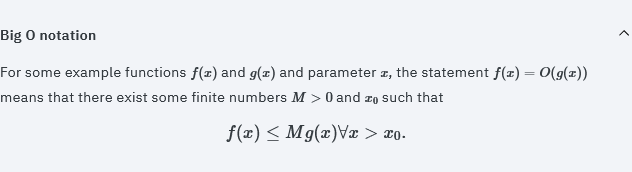

The significance of Big O notation lies in its ability to facilitate comparisons of how algorithmic resources and runtimes scale in relation to the size of the input, irrespective of the specific platform or implementation details. Below are illustrations of typical scaling factors, denoted as N, representing the runtime of an algorithm as a function of the input size, n. It becomes evident that for significantly large problem sizes, the runtime of an algorithm with a complexity of O(a^n) will surpass that of an algorithm with a complexity of O(n^b), where a and b are constants.

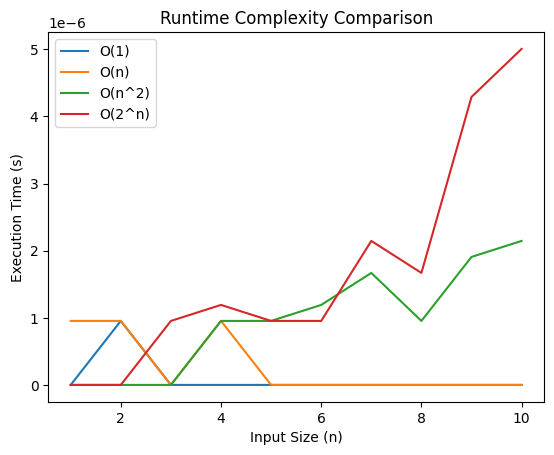

In [1]:
import matplotlib.pyplot as plt
import time

# Function with constant runtime complexity: O(1)
def constant_time():
    return 42

# Function with linear runtime complexity: O(n)
def linear_time(n):
    result = 0
    for i in range(n):
        result += i
    return result

# Function with quadratic runtime complexity: O(n^2)
def quadratic_time(n):
    result = 0
    for i in range(n):
        for j in range(n):
            result += i * j
    return result

# Function with exponential runtime complexity: O(2^n)
def exponential_time(n):
    if n <= 1:
        return n
    return exponential_time(n-1) + exponential_time(n-2)

# Function to measure the execution time of a function
def measure_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

# Input sizes
input_sizes = list(range(1, 11))  # Adjust the input sizes as desired

# Measure execution times for different complexities
constant_times = [measure_time(constant_time) for _ in input_sizes]
linear_times = [measure_time(linear_time, n) for n in input_sizes]
quadratic_times = [measure_time(quadratic_time, n) for n in input_sizes]
exponential_times = [measure_time(exponential_time, n) for n in input_sizes]

# Plotting the graph
plt.plot(input_sizes, constant_times, label='O(1)')
plt.plot(input_sizes, linear_times, label='O(n)')
plt.plot(input_sizes, quadratic_times, label='O(n^2)')
plt.plot(input_sizes, exponential_times, label='O(2^n)')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (s)')
plt.title('Runtime Complexity Comparison')
plt.legend()
plt.show()


## Complexity Theory

Complexity theory encompasses the examination of the computational resources needed to execute algorithms. It allows us to explore the inherent computational effort involved in solving specific problems by considering the most efficient algorithm for the task at hand. In the case of addition, we already possess knowledge of the optimal algorithm, which provides insight into the complexity associated with this problem.


Multiplication is not so simple. Algorithms we learned at school for multiplying two $n$ digit numbers will have required $\mathcal{O}(n^2)$ basic operations, such as single-digit additions and multiplications. Though algorithms with lower asymptotic complexity have been found and it is impossible to perform a multiplication with $\mathcal{O}(n)$ complexity.



In [2]:
# Python implementation of Karatsuba algorithm for bit string multiplication.

# Helper method: given two unequal sized bit strings, converts them to
# same length by adding leading 0s in the smaller string. Returns the
# the new length
def make_equal_length(str1, str2):
	len1 = len(str1)
	len2 = len(str2)
	if len1 < len2:
		for i in range(len2 - len1):
			str1 = '0' + str1
		return len2
	elif len1 > len2:
		for i in range(len1 - len2):
			str2 = '0' + str2
	return len1 # If len1 >= len2

# The main function that adds two bit sequences and returns the addition
def add_bit_strings(first, second):
	result = "" # To store the sum bits

	# make the lengths same before adding
	length = make_equal_length(first, second)
	carry = 0 # Initialize carry

	# Add all bits one by one
	for i in range(length-1, -1, -1):
		first_bit = int(first[i])
		second_bit = int(second[i])

		# boolean expression for sum of 3 bits
		sum = (first_bit ^ second_bit ^ carry) + ord('0')

		result = chr(sum) + result

		# boolean expression for 3-bit addition
		carry = (first_bit & second_bit) | (second_bit & carry) | (first_bit & carry)

	# if overflow, then add a leading 1
	if carry:
		result = '1' + result

	return result

# A utility function to multiply single bits of strings a and b
def multiply_single_bit(a, b):
	return int(a[0]) * int(b[0])

# The main function that multiplies two bit strings X and Y and returns
# result as long integer
def multiply(X, Y):
	# Find the maximum of lengths of x and Y and make length
	# of smaller string same as that of larger string
	n = max(len(X), len(Y))
	X = X.zfill(n)
	Y = Y.zfill(n)

	# Base cases
	if n == 0: return 0
	if n == 1: return int(X[0])*int(Y[0])

	fh = n//2 # First half of string
	sh = n - fh # Second half of string

	# Find the first half and second half of first string.
	Xl = X[:fh]
	Xr = X[fh:]

	# Find the first half and second half of second string
	Yl = Y[:fh]
	Yr = Y[fh:]

	# Recursively calculate the three products of inputs of size n/2
	P1 = multiply(Xl, Yl)
	P2 = multiply(Xr, Yr)
	P3 = multiply(str(int(Xl, 2) + int(Xr, 2)), str(int(Yl, 2) + int(Yr, 2)))

	# Combine the three products to get the final result.
	return P1*(1<<(2*sh)) + (P3 - P1 - P2)*(1<<sh) + P2

if __name__ == '__main__':
	print(multiply("1100", "1010"))
	print(multiply("110", "1010"))
	print(multiply("11", "1010"))
	print(multiply("1", "1010"))
	print(multiply("0", "1010"))
	print(multiply("111", "111"))
	print(multiply("11", "11"))


120
60
30
10
0
49
9


Even with all this, multiplication is not them most complex problem that we have. A problem which is far more complex is **factorization**: taking an $n$ digit number and finding its prime factors. The best known algorithm in this case has a complexity of $\mathcal{O}(e^{n^{1/3}})$.
The exponential here means that the compelxity grows very quickly and makes factorizationa very hard probelm to solve.


Here's an example of few well known algorithms for prime factorization

In [3]:
# Python 3 program to find a prime factor of composite using
# Pollard's Rho algorithm
import random
import math

# Function to calculate (base^exponent)%modulus
def modular_pow(base, exponent,modulus):

	# initialize result
	result = 1

	while (exponent > 0):

		# if y is odd, multiply base with result
		if (exponent & 1):
			result = (result * base) % modulus

		# exponent = exponent/2
		exponent = exponent >> 1

		# base = base * base
		base = (base * base) % modulus

	return result

# method to return prime divisor for n
def PollardRho( n):

	# no prime divisor for 1
	if (n == 1):
		return n

	# even number means one of the divisors is 2
	if (n % 2 == 0):
		return 2

	# we will pick from the range [2, N)
	x = (random.randint(0, 2) % (n - 2))
	y = x

	# the constant in f(x).
	# Algorithm can be re-run with a different c
	# if it throws failure for a composite.
	c = (random.randint(0, 1) % (n - 1))

	# Initialize candidate divisor (or result)
	d = 1

	# until the prime factor isn't obtained.
	# If n is prime, return n
	while (d == 1):

		# Tortoise Move: x(i+1) = f(x(i))
		x = (modular_pow(x, 2, n) + c + n)%n

		# Hare Move: y(i+1) = f(f(y(i)))
		y = (modular_pow(y, 2, n) + c + n)%n
		y = (modular_pow(y, 2, n) + c + n)%n

		# check gcd of |x-y| and n
		d = math.gcd(abs(x - y), n)

		# retry if the algorithm fails to find prime factor
		# with chosen x and c
		if (d == n):
			return PollardRho(n)

	return d

# Driver function
if __name__ == "__main__":

	n = 10967535067
	print("One of the divisors for", n , "is ",PollardRho(n))

# This code is contributed by chitranayal


One of the divisors for 10967535067 is  104729


To demonstrate this point using actual computation time, we can take a recent example. Consider the following 829-digit number.

In [4]:
rsa_250 = 2140324650240744961264423072839333563008614715144755017797754920881418023447140136643345519095804679610992851872470914587687396261921557363047454770520805119056493106687691590019759405693457452230589325976697471681738069364894699871578494975937497937

If you try using your computer to add or multiply numbers of this size, you'll find that it can solve such problems very quickly. If you multiply the number of processors your computer has with the number of seconds it takes to get the number of core-seconds, you are sure to find that very much less than 1 core-second is required.

However, performing factorization on this number requires a supercomputer and around 2700 core-years, which eventually yields the following two factors.

In [5]:
p = 64135289477071580278790190170577389084825014742943447208116859632024532344630238623598752668347708737661925585694639798853367
q = 33372027594978156556226010605355114227940760344767554666784520987023841729210037080257448673296881877565718986258036932062711
p*q

2140324650240744961264423072839333563008614715144755017797754920881418023447140136643345519095804679610992851872470914587687396261921557363047454770520805119056493106687691590019759405693457452230589325976697471681738069364894699871578494975937497937

For the factorization of larger numbers, we easily get to a point where a planet-sized supercomputer would need to run for the age of the universe. Clearly, any such problem is practically impossible.

Until now, our focus has primarily been on mathematical operations involving n-digit numbers, where complexity was measured in terms of the count of basic operations needed. Nevertheless, complexity theory can extend its applicability beyond mathematical operations and encompass the analysis of computational approaches for various problem domains. Whether it involves searching databases, rendering graphics, or simulating dynamic systems, complexity theory enables the examination of computational methods across a wide range of applications.

In each case, we are able to find a parameter or set of parameters that serve as our input size and express the complexity in terms of this input size using big O notation. For searching a database of $N$ entries, for example, the complexity is $\mathcal{O}(N)$.

The determination of an algorithm's complexity relies on the precise theoretical model of computation being employed. Each model encompasses a set of fundamental operations, known as primitive operations, which form the basis for expressing any algorithm. In the context of Boolean circuits, as we examined earlier, logic gates serve as the primitive operations.

In the case of Turing machines, an abstract computational device devised by Alan Turing, we envision a mechanism that traverses and manipulates information stored on a tape.

The RAM model, on the other hand, involves a more intricate set of primitive operations and serves as an idealized representation of the computers we employ in our daily lives.

Despite their apparent differences, these models of digital computation are remarkably capable of simulating one another. Consequently, in most scenarios, the computational complexity remains largely independent of the specific model utilized.

Rather than ascribing complexity exclusively to the RAM model or Turing machines, we can thus discuss complexity in the context of digital computers as a more general framework.

## Beyond Digital Computation

While **digital computers** have emerged as the predominant form of computation today, it is important to acknowledge that they are not the sole representation of computational systems.

In the past, **analog computers** were extensively studied and utilized. Unlike their digital counterparts, analog computers rely on precise manipulations of continuously varying parameters instead of discrete values.
**Some proponents of analog computers have suggested that these devices possess the ability to rapidly solve problems that are deemed intractable for digital computers. However, such claims have yet to materialize**.

**Analog computers** face a significant obstacle in their inability to construct devices with arbitrarily high precision. In **digital computers**, the discretization process ensures that errors must reach a certain magnitude to become noticeable, allowing for the implementation of error-detection and error-correction methods.

Conversely, in **analog computers**, errors can be infinitesimally small and undetectable, yet their cumulative effects can disrupt computations, rendering them unreliable. This inherent limitation poses a significant challenge for analog computing systems.

If we were to propose an ideal model of computation, it would likely aim to combine the resilience of digital computers with the intricate manipulations of analog computers. Quantum mechanics provides a promising avenue for achieving this synthesis. As we have witnessed, qubits possess discrete outputs of 0 and 1, while simultaneously existing in states that require continuous parameters for description. This intriguing phenomenon stems from the well-established concept of wave-particle duality intrinsic to quantum systems. Such systems defy complete categorization as either discrete or continuous, exhibiting a unique amalgamation of both. In the words of Einstein

*'It seems as though we must use sometimes the one theory and sometimes the other, while at times we may use either. We are faced with a new kind of difficulty. We have two contradictory pictures of reality; separately neither of them fully explains the phenomena...but together they do.'*


Therefore, a quantum computer, wherein gates operate on qubits as the fundamental operations, transcends the realms of both analog and digital. It embodies a distinct and unparalleled nature. In subsequent chapters, we will explore the far-reaching implications of this distinctive quality. We will discover that quantum computers have the potential to solve problems with radically different complexities compared to their digital counterparts. Remarkably, quantum computing represents the only known technology capable of exponentially outperforming classical computers for certain tasks, potentially transforming calculations that would take years into mere minutes. Additionally, we will delve into the realm of quantum error correction and explore how it can mitigate the effects of imperfections, paving the way for reliable quantum computation.

# When to Use a Quantum Computer


With qubits and quantum gates, we can design novel algorithms that are fundamentally different from digital and analog classical ones. In this way, we hope to find solutions to problems that are intractable for classical computers.

An effective approach to address this is when we encounter a scenario where we need to ascertain a global characteristic of a function. For instance, we may aim to determine the value of a parameter, denoted as $x$, at which a given function $f(x)$ attains its minimum, or to identify the period of the function if $f(x)$ exhibits periodicity.

In the realm of digital computing, an algorithm would typically involve evaluating $f(x)$ for various inputs to acquire adequate information about the desired global property. However, in the case of quantum computing, the ability to create superposition states empowers us to apply the function simultaneously to multiple potential inputs.

It is important to note that this does not imply direct access to all possible outputs since measuring such a state yields only a single result. Nonetheless, we can leverage the concept of inducing a quantum interference effect, which enables us to uncover the sought-after global property. By manipulating the quantum system, we can exploit the interference patterns arising from the superposition states to extract the desired information.

This general description illustrates the workings of many of the quantum algorithms that have already been discovered. One prominent example is **Grover's algorithm**, which reduces the complexity of searching through $N$ items from $\mathcal{O}(N)$ to $\mathcal{O}(\sqrt{N})$. This quadratic speedup could be useful in many applications with tasks that can be expressed as an unstructured search, such as optimization problems and machine learning.

An even more impressive speedup is obtained with **Shor's algorithm**, which analyses periodic functions at the heart of the factorization problem. This allows a quantum solution for factoring $n$-digit numbers with complexity
$\mathcal{O}(n^3)$. This is a superpolynomial speedup compared with the complexity for digital computers, which is worse than $\mathcal{O}(e^{n^{1/3}})$.

Another approach towards quantum algorithms is to use quantum computers to solve quantum problems. As we will see in the further blogs, expressing a quantum state requires an amount of information that scales exponentially with the number of qubits. Just writing down the $n$ state of qubits therefore becomes an intractable task for digital computers as $n$ increases. However, for a quantum computer we just need $n$ qubits to do the same job. This natural capability to express and manipulate quantum states allows us to study and better understand quantum systems of interest, such as molecules and fundamental particles.

Applying and adapting quantum algorithms in different industries therefore has the promise of enabling disruptive use cases in business and science. These include breakthroughs in drug discovery, machine learning, materials discovery, option pricing, protein folding, and supply chain. Particularly promising are those problems for which classical algorithms face inherent scaling limits and which do not require a large classical dataset to be loaded. For quantum advantage, a given problem's answers need to strongly depend on exponentially many entangled degrees of freedom with structure such that quantum mechanics evolves to a solution without having to go through all paths. Note, however, that the precise relationship between problems that are 'easy' for quantum computers (solvable in polynomial time) and other complexity-theoretic classes is still an open question

This is just a taste of how quantum algorithms can perform computation in an unique way. More details on these approaches can be found in later blogs. But first we need to look beyond the single qubit and invest some time into understanding the full set of quantum gates that we will need. This will be the focus of the next blog.